In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


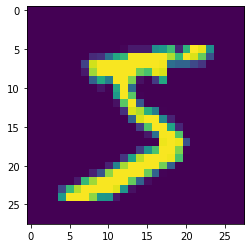

In [ ]:
plt.imshow(X_train[0])

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
only_zeros = X_train[y_train==0]

In [ ]:
only_zeros.shape

(5923, 28, 28)

In [ ]:
X_train.shape

(60000, 28, 28)

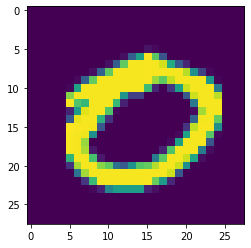

In [ ]:
plt.imshow(only_zeros[14])

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Reshape, Flatten
from tensorflow.keras.models import Sequential

In [ ]:
discriminator = Sequential()

discriminator.add(Flatten(input_shape=[28,28]))
discriminator.add(Dense(150, activation = 'relu' ))
discriminator.add(Dense(100, activation = 'relu' ))

# Final output layer
discriminator.add(Dense(1, activation = 'sigmoid')) # since binary classification 

discriminator.compile(loss = 'binary_crossentropy', optimizer ='adam' )

In [ ]:
# 784--> 150 --> 30 -- 150 --> 784
codings_size = 100 # represents the 30 mid point 
# 100--> 150 --> 784

generator = Sequential()
generator.add(Dense(100, activation = 'relu', input_shape=[codings_size]))
generator.add(Dense(150, activation = 'relu'))
generator.add(Dense(784, activation = 'relu'))

generator.add(Reshape([28,28]))

In [ ]:
GAN = Sequential([generator, discriminator])

In [ ]:
discriminator.trainable = False

In [ ]:
GAN.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [ ]:
batch_size = 32 # if u want traing to be faster you can pick larger batch_size

In [ ]:
my_data = only_zeros

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices(my_data).shuffle(buffer_size =1000)

In [ ]:
type(dataset)

tensorflow.python.data.ops.dataset_ops.ShuffleDataset

In [ ]:
dataset = dataset.batch(batch_size, drop_remainder = True).prefetch(1)

In [ ]:
epochs = 1

In [ ]:
GAN.layers[1].summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 150)               117750    
                                                                 
 dense_4 (Dense)             (None, 100)               15100     
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 132,951
Trainable params: 0
Non-trainable params: 132,951
_________________________________________________________________


In [ ]:
generator, discriminator = GAN.layers

for epoch in range(epochs) : 
  print(f"currently on Epoch {epochs+1}")
  i = 0
  for X_batch in dataset: 

    i = i+1

    if i%100 == 0:
      print(f"\t Currently on batch nuber {i} of {len(my_data)//batch_size}")

   # Discmrinator training phase
    noise = tf.random.normal(shape=[batch_size, codings_size])  

    gen_images = generator(noise)

    X_fake_vs_real = tf.concat([gen_images,tf.dtypes.cast(X_batch, tf.float32)], axis = 0)

    y1 = tf.constant([[0.0]]*batch_size + [[1.0]]*batch_size)

    discriminator.trainable = True

    discriminator.train_on_batch(X_fake_vs_real, y1)

   #Train Generator
    noise = tf.random.normal(shape=[batch_size, codings_size])
    y2 = tf.constant([[1.0]]*batch_size)
    discriminator.trainable = False
    GAN.train_on_batch(noise, y2)




currently on Epoch 2
	 Currently on batch nuber 100 of 185


In [ ]:
noise = tf.random.normal(shape=[10,codings_size])

In [ ]:
noise.shape

TensorShape([10, 100])

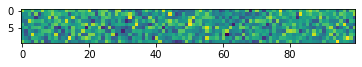

In [ ]:
plt.imshow(noise)

In [ ]:
images = generator(noise)

In [ ]:
images.shape

TensorShape([10, 28, 28])

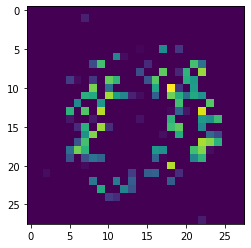

In [ ]:
plt.imshow(images[0])

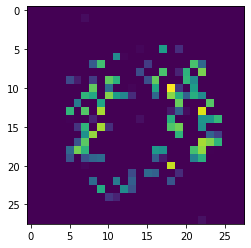

In [ ]:
plt.imshow(images[4])